In [1]:
from functions.correlation_maps import simpleCorrelationMap, correlationMap_1D_v3, correlationMap_2D_v3#, correlationMap_2D, correlationMap_1D,
from functions.loading_and_processing_data import loadMITgcmData
from functions.other_functions import computeBuoyancy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from functions.other_functions import computeBuoyancy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from functions.loading_and_processing_data import loadMITgcmData, loadPACEData, detrend_and_average_MITgcmData, read_all_data, loadTimeSeriesData

import sys
sys.path.append('/data/hpcdata/users/grejan/mitgcm/') #Make sure we can also import Kaitlins code.
from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid

In [3]:
gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
grid = Grid(gp)

/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:330: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hasattr(self, 'mode') and self.mode is 'w':
/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:705: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if typecode is not 'c':


In [4]:
dataU=loadMITgcmData(filename='bottom100m_averaged_UVEL', members=[0,3], kind='old')
dataV=loadMITgcmData(filename='bottom100m_averaged_VVEL', members=[0,3], kind='old')
melt=loadTimeSeriesData(filename='timeseries_final', members=[0,3], kind='old')['dotson_to_cosgrove_massloss']

Loading number:0
../data/bottom100m_averaged_UVEL_ens1.nc
Loading number:1
../data/bottom100m_averaged_UVEL_ens2.nc
Loading number:2
../data/bottom100m_averaged_UVEL_ens3.nc
Loading number:0
../data/bottom100m_averaged_VVEL_ens1.nc
Loading number:1
../data/bottom100m_averaged_VVEL_ens2.nc
Loading number:2
../data/bottom100m_averaged_VVEL_ens3.nc
Loading number:0
../data/timeseries_final_PACE01.nc
Loading number:1
../data/timeseries_final_PACE02.nc
Loading number:2
../data/timeseries_final_PACE03.nc


In [5]:
dataU1=loadMITgcmData(filename='depth_averaged_UVEL', members=[0,3], kind='old')
dataV1=loadMITgcmData(filename='depth_averaged_VVEL', members=[0,3], kind='old')
dataU=dataU-dataU1
dataV=dataV-dataV1

Loading number:0
../data/depth_averaged_UVEL_ens1.nc
Loading number:1
../data/depth_averaged_UVEL_ens2.nc
Loading number:2
../data/depth_averaged_UVEL_ens3.nc
Loading number:0
../data/depth_averaged_VVEL_ens1.nc
Loading number:1
../data/depth_averaged_VVEL_ens2.nc
Loading number:2
../data/depth_averaged_VVEL_ens3.nc


In [6]:
meltrm=melt.sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean()
umean=dataU.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])
vmean=dataV.where(meltrm>meltrm.quantile(0.9)).mean(dim=['time', 'ens'])

In [7]:
umean2=dataU.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])
vmean2=dataV.where(meltrm<meltrm.quantile(0.1)).mean(dim=['time', 'ens'])

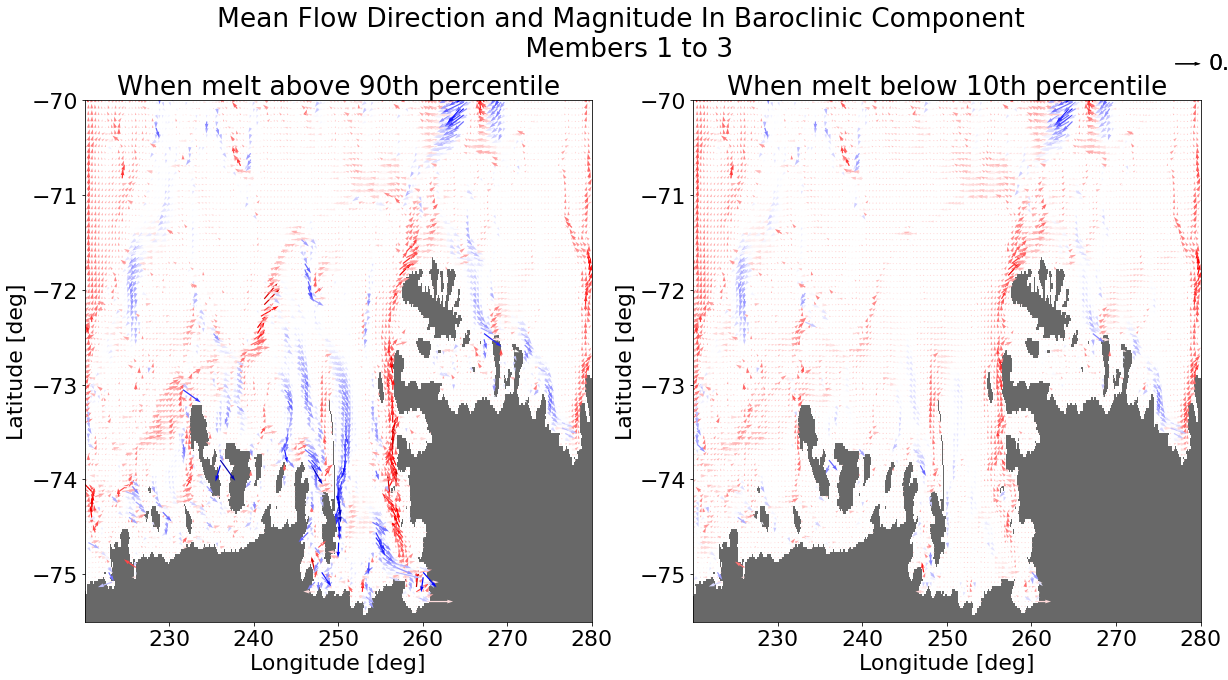

In [12]:
step1=2
step2=4
scale=2

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
plt.suptitle('Mean Flow Direction and Magnitude In Baroclinic Component \n Members 1 to 3')
ax=plt.subplot(1,2,1)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean.XC[::step2], umean.YC[::step1], umean['UVEL'].values[::step1, ::step2], vmean['VVEL'].values[::step1, ::step2], vmean['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('When melt above 90th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim([-75.5, -70])

ax=plt.subplot(1,2,2)
plt.pcolor(360+grid.lon_2d[grid.lat_1d<-70,:], grid.lat_2d[grid.lat_1d<-70,:], grid.land_mask[grid.lat_1d<-70,:], cmap='Greys', vmax=1.5)
Q=plt.quiver(vmean2.XC[::step2], umean2.YC[::step1], umean2['UVEL'].values[::step1, ::step2], vmean2['VVEL'].values[::step1, ::step2], vmean2['VVEL'].values[::step1, ::step2], scale=scale, cmap='seismic')
qk = ax.quiverkey(Q, 0.9, 0.9, 0.1, r'$0.1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.title('When melt below 10th percentile')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')

from datetime import date
today = date.today()
today=today.strftime("%Y%m%d")

plt.ylim([-75.5, -70])
plt.subplots_adjust(top=0.85)
plt.savefig('../03_output/other/'+today+'_mean_flow_direction_versus_melt_baroclinic_1-3.png')

# plt.subplot(2,2,2)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)

# plt.subplot(2,2,3)
# plt.quiver(umean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], vmean2.values[::step1, ::step2], scale=scale, cmap='seismic')
# plt.subplot(2,2,4)
# plt.plot(melt.sel(time=slice('1920', '2013')).indexes['time'].to_datetimeindex(), 
#          melt.mean(dim='ens').sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean(), c='b')
# plt.grid(True)